This tutorial is about
- Define J1-J2 Hamiltonian
- Define CNN with the ability to learn signs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import quantax as qtx

# change default dtype to complex
qtx.set_default_dtype(jnp.complex128)

# 4x4 square lattice, 8 spin-up, 8 spin-down
lattice = qtx.sites.Square(4, Nparticle=(8, 8))
N = lattice.N

In [ ]:
from quantax.symmetry import SpinInverse, C4v, Trans2D

# J1=1, J2=0.5, with Marshall sign rule
H = qtx.operator.Heisenberg(J=[1, 0.5], n_neighbor=[1, 2], msr=True)

# The network has real parameters and complex outputs
net = qtx.model.ResSum(2, 8, 4)

state = qtx.state.Variational(
    net,
    max_parallel=32768, # maximum forward batch on each machine
)

# sampler contains spin exchanges between nearest and next nearest neighbors
sampler = qtx.sampler.SpinExchange(state, 1000, n_neighbor=[1, 2])
optimizer = qtx.optimizer.SR(state, H)

Could not load symbol cuFuncGetName. Error: /lib/x86_64-linux-gnu/libcuda.so.1: undefined symbol: cuFuncGetName
2025-08-07 16:35:14.951171: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:15.101916: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:15.285713: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:15.452256: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please inv

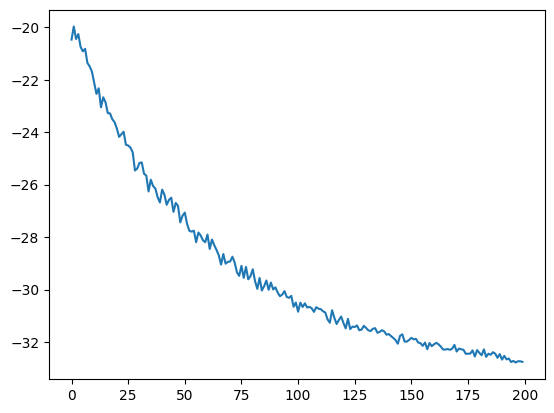

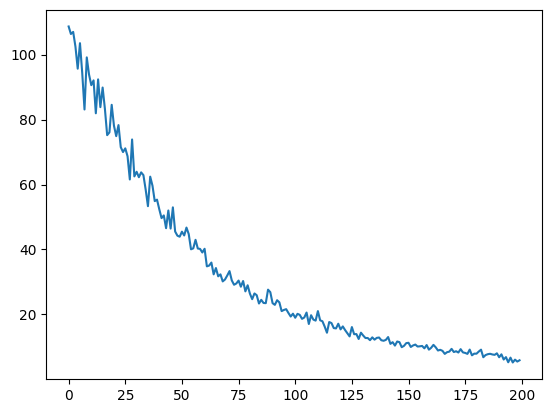

In [ ]:
energy_data = qtx.utils.DataTracer()
VarE_data = qtx.utils.DataTracer()

for i in range(200):
    samples = sampler.sweep()
    step = optimizer.get_step(samples)
    state.update(step * 1e-3)
    energy_data.append(optimizer.energy)
    VarE_data.append(optimizer.VarE)

energy_data.plot()
plt.show()
VarE_data.plot()
plt.show()

In [ ]:
# symmetrize the trained NQS

symm = SpinInverse() + C4v()
symm_state = qtx.state.Variational(
    state.model,
    symm=symm,
    max_parallel=32768,
)

sampler = qtx.sampler.SpinExchange(symm_state, 1000, n_neighbor=[1, 2])
optimizer = qtx.optimizer.SR(symm_state, H)

2025-08-07 16:35:41.270158: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:41.437263: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:41.742767: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:41.952459: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-07 16:35:42.274046: E external/xla/xla/stream_executor/cuda/cuda_timer.cc:86

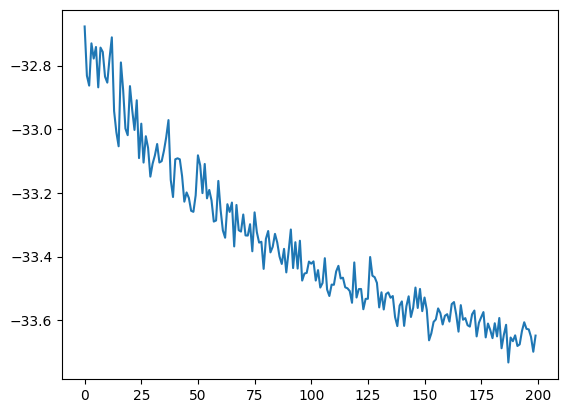

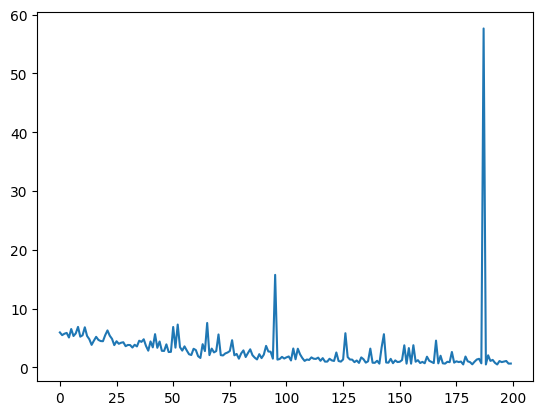

In [ ]:
energy_data = qtx.utils.DataTracer()
VarE_data = qtx.utils.DataTracer()

for i in range(200):
    samples = sampler.sweep()
    step = optimizer.get_step(samples)
    symm_state.update(step * 1e-3)
    energy_data.append(optimizer.energy)
    VarE_data.append(optimizer.VarE)

energy_data.plot()
plt.show()
VarE_data.plot()
plt.show()

In [6]:
# check result by ED
full_symm = symm + Trans2D()
E, wf = H.diagonalize(full_symm)
print(E[0])

/home/aochen/quantax_env/lib/python3.12/site-packages/quantax/symmetry/symmetry.py:268: GeneralBasisWarning: using non-commuting symmetries can lead to unwanted behaviour of general basis, make sure that quantum numbers are invariant under non-commuting symmetries!
  basis = spin_basis_general(self.N, Nup, pauli=0, make_basis=False, **blocks)


-33.83169340557945
